<a href="https://colab.research.google.com/github/Uz8351/MyPhython/blob/master/Copia_de_jugarEULER_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1/1 [==============================] - 0s 56ms/step
MAPE: 1.9855981686758617
1/1 [==============================] - 0s 21ms/step
Predicción para x: [ 5. 12.] : 54.96412


1/1 [==============================] - 0s 20ms/step
[[37.99272 ]
 [52.8427  ]
 [67.69268 ]
 [82.542656]
 [97.39263 ]]


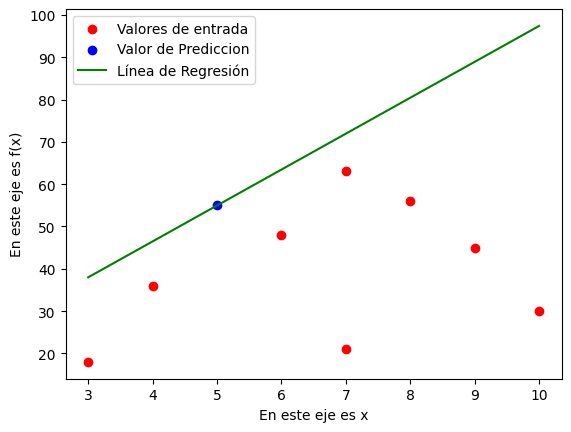

In [ ]:
from keras.activations import relu
from keras.api._v2.keras import activations
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#Matriz tipo 21,2
Valores_Entrada=np.array([[3,6],
                          [4,9],
                          [8,7],
                          [9,5],
                          [6,8],
                          [7,3],
                          [10,3],
                          [7,9]],dtype=float)
#Matriz tipo 21,1
Valores_Salida=np.array([[18],
                         [36],
                         [56],
                         [45],
                         [48],
                         [21],
                         [30],
                         [63]],dtype=float)



#////////////////////////////////////////////////////////////////////

Modelo_Adoptado = tf.keras.Sequential([
    tf.keras.layers.Dense(units=12, activation='relu', input_shape=(Valores_Entrada.shape[1],)),
    tf.keras.layers.Dense(units=1)])
print('\n')
Modelo_Adoptado.compile(optimizer='Adam',loss='mean_squared_error')
Modelo_Adoptado.fit(Valores_Entrada,Valores_Salida,epochs=20000,verbose=0)

#*********************************************************
# Después de entrenar el modelo y obtener predicciones
predicciones = Modelo_Adoptado.predict(Valores_Entrada)

# Calcula el error absoluto entre predicciones y valores reales
errores_absolutos = np.abs(predicciones - Valores_Salida)

# Calcula el porcentaje de error absoluto medio (MAPE)
mape = np.mean(errores_absolutos / Valores_Salida) * 100

print("MAPE:", mape)
#************************************************

Nuevo_Valor_x=np.array([[5,12]],dtype=float)
Prediccion_y=Modelo_Adoptado.predict(Nuevo_Valor_x)
#Imprimimos la predicción.
print("Predicción para x:",Nuevo_Valor_x[0], ":",Prediccion_y[0][0])


#///////////////////////////////////////////////////////////////

# Predicciones para trazar la línea de regresión
x_rangos = np.linspace(min(Valores_Entrada[:, 0]), max(Valores_Entrada[:, 0]), 5)
#print(x_rangos)
print('\n')
y_rangos = Modelo_Adoptado.predict(np.column_stack((x_rangos, np.full_like(x_rangos, Nuevo_Valor_x[0][1]))))
print(y_rangos)
plt.scatter(Valores_Entrada[:, 0], Valores_Salida, color='red', label='Valores de entrada')
plt.scatter(Nuevo_Valor_x[:, 0], Prediccion_y, color='blue', label='Valor de Prediccion')

# Trazar la línea de regresión
plt.plot(x_rangos, y_rangos, color='green', label='Línea de Regresión')

plt.xlabel('En este eje es x')
plt.ylabel('En este eje es f(x)')
plt.legend()
plt.show()


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Valores_Entrada = np.array([[3, 6], [4, 9], [8, 7], [9, 5], [6, 8], [7, 3], [10, 3], [7, 9]], dtype=float)
Valores_Salida = np.array([[18], [36], [56], [45], [48], [21], [30], [63]], dtype=float)

Modelo_Adoptado = tf.keras.Sequential([
    tf.keras.layers.Dense(units=12, activation='relu', input_shape=(Valores_Entrada.shape[1],)),
    tf.keras.layers.Dense(units=1, activation='linear')])

Modelo_Adoptado.compile(optimizer='Adam', loss='mean_squared_error')
Modelo_Adoptado.fit(Valores_Entrada, Valores_Salida, epochs=20000, verbose=0)

Nuevo_Valor_x = np.array([[5, 12]], dtype=float)
Prediccion_y = Modelo_Adoptado.predict(Nuevo_Valor_x)
print("Predicción para x:", Nuevo_Valor_x[0], ":", Prediccion_y[0][0])

x_rangos = np.linspace(min(Valores_Entrada[:, 0]), max(Valores_Entrada[:, 0]), 5)
y_rangos = Modelo_Adoptado.predict(np.column_stack((x_rangos, x_rangos)))  # Toma en cuenta ambos atributos

plt.scatter(Valores_Entrada[:, 0], Valores_Salida, color='red', label='Valores de entrada')
plt.scatter(Nuevo_Valor_x[:, 0], Prediccion_y, color='blue', label='Valor de Predicción')
plt.plot(x_rangos, y_rangos, color='green', label='Línea de Regresión')
plt.xlabel('En este eje es x')
plt.ylabel('En este eje es f(x)')
plt.legend()
plt.show()
